# Reddit NLP analysis

## Objective

The reason I chose two subreddits below is due to the nature of fashion at the moment. The erasure of the gender boundaries can be observed over the recent decade: female trends have become more masculine, adopting _"traditionally"_ male fashion pieces and jargon, whereas men's fashion showcased adaptation of _"traditionally"_ female fabrics such as chiffon and lace. I wanted to analyze how different are we in languages that we utilise in these _unisex_ setting.
 
 
     - Male Fashion Advice with 2.2 mln subscribers
     
     - Female Fashion Advice with 850 k subscribers

These two subreddits are good in a sense that for malefashionadvice the majority of participants are prevalently men and vice versa for female thread, and most of the text would be used in the post not in the comment section, providing me with an opportunity to actually analyze the differences in gender languages.




So the main objectives of the project are to:


 - Analyze two subreddits and the difference in the language used in the two threads
     
     
 - Create model with highest accuracy score and minimize Type I and Type II errors

## Project Overview

1. For this project I had to pull in the data first, so I scraped the data using Reddit API

    - I was able to collect enough dataset for my project around 3835 posts proportinately divided between two subreddits
    
    
2. Data cleaning is an essentail part of any data science project

    - There were missing values in the dataset, but I mostly didn't need these features for my model
    
    - The only features I was interested in are 'selftext' and 'title'
    
    - And I had to engineer the main feature since the actual posts are in the 'selftext' columns, but the may be missing due to the nature of the post, i.e. posing a question in the 'title' section
    
    
3. As for data munging, I had to create the model first and analyze it performance

    - Only then I could go back and create several lists for stop words to be used in the model
    
    
4. In order to select the best fit model I utlized GridSearch and Pipeline in order to tweak the features of the transformer and used it on Naive Bayes model and Logistic Regression model

    - Logistic Regression model performed substantially better and I was able to achieve zero false positives


5. Data visualisation in order to analyze:

    - what words are most common between two subreddits
    
    - word and sentence length
    
    - which words were assigned the highest coefficients
    
    
6. Conclusions on the project


## Useful links

1. This is the link to the [Data Scraper NB](./Scraper.ipynb) in case you want to check out the code for scraping data using Reddit API

2. To check out the data cleaning process click on this link [Data Cleaning NB](./Data_cleaning.ipynb)

3. Follow this link [Model NB](./Model_2.ipynb) to check out how Naive Bayes model performed against Logistic Regression model using GridSearch and Pipeline

4. [Exploratory Data Analysis and Visualization ](#EDA)

5. [Model performance and analysis](#Model)

6. [Coefficient analysis](#Coefficient)

7. [Conclusions on the project](#Conclusion)

## <a name = 'EDA' style = 'color: black'>EDA</a>

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_data2.csv')

In [3]:
len(df)

3835

Setting up a dataframe for the model

In [4]:
df1 = df[['slftxt_ttl', 'target']]

I used built-in stop words in CountVectorizer, English stop words for the GridSearch, and I had to create s custom stop list in order to exclude gender related words

In [5]:
stops = list(ENGLISH_STOP_WORDS)
custom_stops = ['www', 'com', 'reddit', 'http', 'https',\
                'malefashionadvice', 'femalefashionadvice',\
                'mens', 'men', 'man', 'woman', 'women', 'womens', 'her', 'his']
stops.extend(custom_stops)

I used the function below to lemmatize and stemmatize the words for the model to see how it affects the model performance. Turns out, the default CountVectorizer preprocessing does a better job for the model performance.

In [8]:
def msgs_to_words(msgs):
   
    letters_only = re.sub("[^a-zA-Z]", " ", msgs)

    words = letters_only.lower().split()
    
    lem_words = [lemmatizer.lemmatize(i) for i in words]
    
#     stem_words = [p_stemmer.stem(i) for i in words]
    
    meaningful_words = [w for w in words if not w in stops]

    return(" ".join(meaningful_words))

In [9]:
df1['slftxt_ttl'] = df1['slftxt_ttl'].apply(msgs_to_words)

C:\Users\Rauan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


I created a new column to calculate the length of the post for two subreddits and plotted a histogram in order to see how they differ

In [10]:
df1['word_length'] = df1['slftxt_ttl'].apply(len)

C:\Users\Rauan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


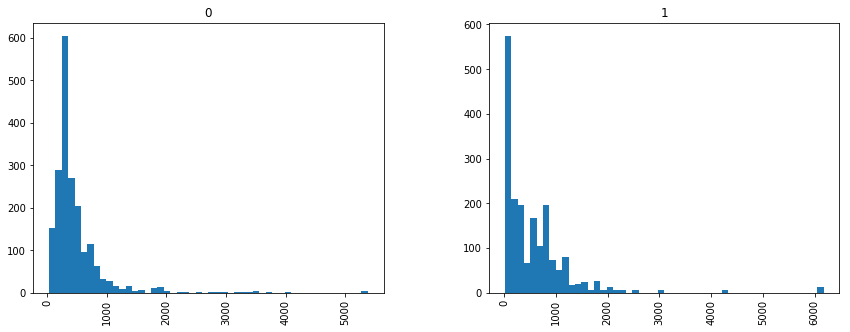

In [11]:
df1.hist(column='word_length', by='target', bins=50, figsize=(14, 5));

CountVectorizer with min_df set to 50 creates the following matrix, which I can then use to plot the most common words in the dataframe

In [12]:
cvec = CountVectorizer(min_df=50)

sparse_matrix = cvec.fit_transform(df1['slftxt_ttl'])

dense_matrix = sparse_matrix.todense()

feature_df = pd.DataFrame(dense_matrix, columns=cvec.get_feature_names())
feature_df.head(10)

,aautomoderator,able,absolutely,accessories,acronym,actual,actually,add,advance,advice,...,workwear,world,worn,worried,worth,wouldn,wrong,year,years,young
0,6,0,0,1,0,0,0,0,0,6,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the two subreddits I chose are related to fashion, the most common words should obviously be related to fashion somehow, i.e. 'fashion', 'style', 'look', 'wear', 'clothes'. But also the words such as 'thread' or 'question' are specific to the nature of subreddits, since those two are 'Malefashionadvice' and 'Femalefashionadvice', people would generate threads to discuss the trend or certain look, seek advice and thus pose questions.

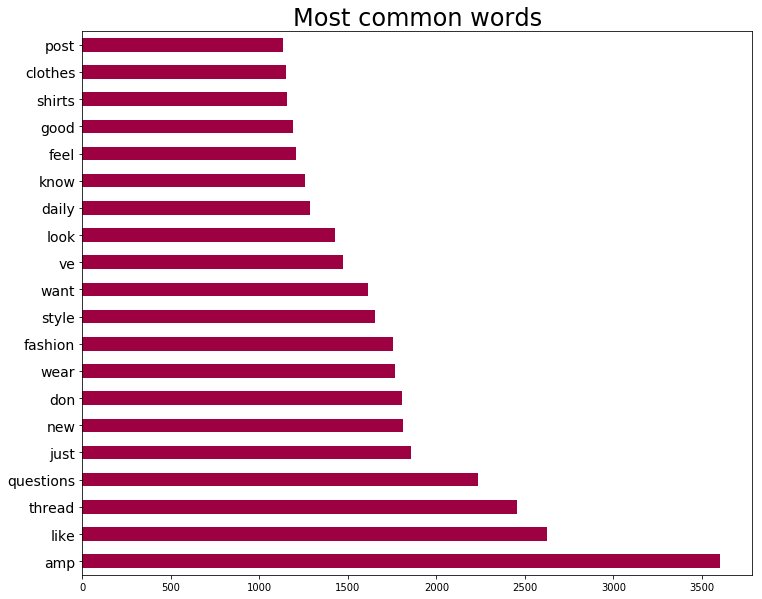

In [13]:
feature_df.sum().sort_values(ascending=False).head(20).plot(kind='barh', figsize=(12,10), colormap='Spectral')
plt.yticks(fontsize=14)
plt.title('Most common words', fontsize=24);

I created the most common words for two subreddits in order to find out which words are used more.
The graphs below show that although there are many overlapping common words, some a really specific to the particular subreddit. Women tend to say **'How to dress?', 'Want', 'Wear', 'Fashion'** are more frequently than men in their respective subreddit. The most common words in male subreddits are **shirt and shoes**, and strangely 'amp' which stands for **_&_** sign which leads me to thinking that men tend to abbreviate and shorten their posts more than women do.

In [14]:
female = feature_df.loc[df1['target'] == 0, :].copy()
male = feature_df.loc[df1['target'] == 1, :].copy()

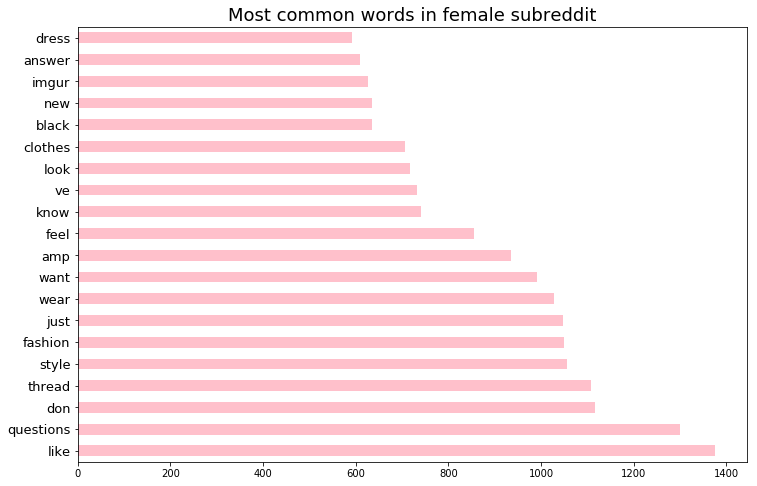

In [15]:
female.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='pink', figsize=(12,8))
plt.yticks(fontsize=13)
plt.title('Most common words in female subreddit', fontsize=18);

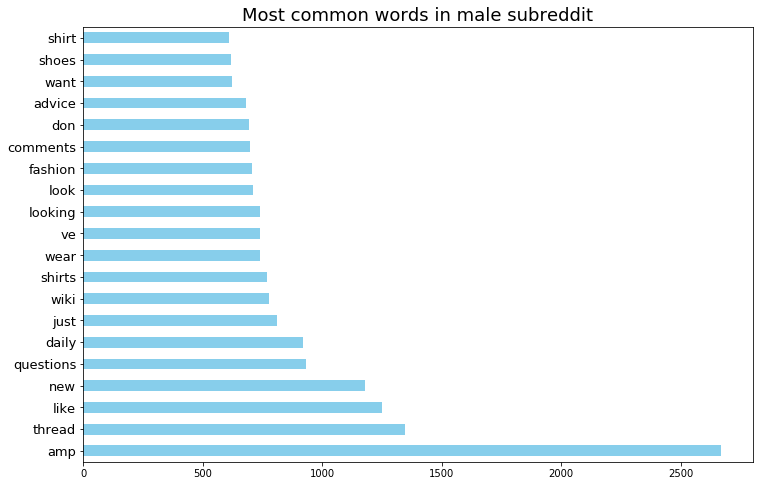

In [16]:
male.sum().sort_values(ascending=False).head(20).plot(kind='barh', color='skyblue', figsize=(12,8))
plt.yticks(fontsize=13)
plt.title('Most common words in male subreddit', fontsize=18);

I wanted to compare the use of the most common words overall in the dataframe side by side. From the graphs below it is pretty obvious that female subreddit uses words that describe emotions such as **feel, want** more frequently than men, as well as words as **fashion, style, wear**.

In [17]:
common_words = feature_df.sum().sort_values(ascending=False).head(25).index

In [18]:
# female = feature_df[df['subreddit']=='femalefashionadvice']

In [19]:
common_words

Index(['amp', 'like', 'thread', 'questions', 'just', 'new', 'don', 'wear',
       'fashion', 'style', 'want', 've', 'look', 'daily', 'know', 'feel',
       'good', 'shirts', 'clothes', 'post', 'dress', 'really', 'looking',
       'shoes', 'comments'],
      dtype='object')

In [20]:
# male = feature_df[df['subreddit']=='malefashionadvice']

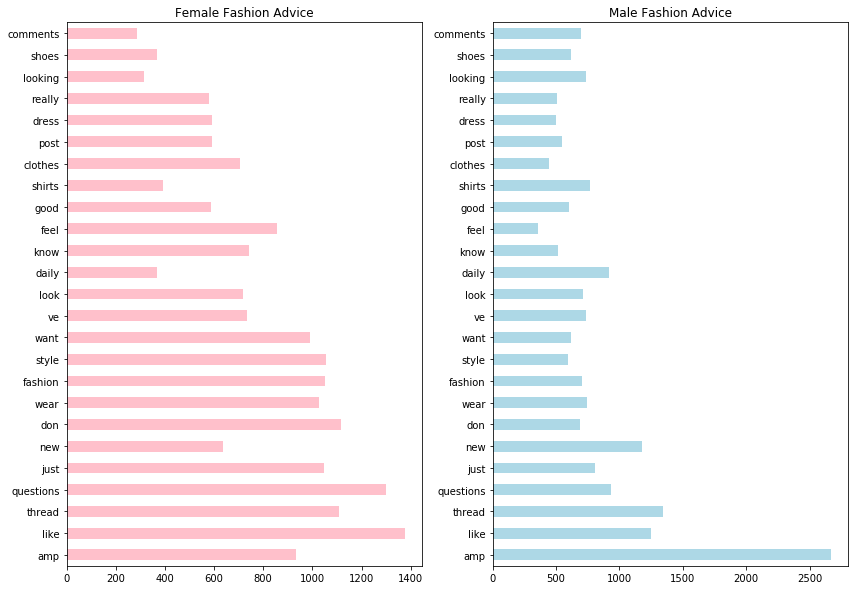

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,10))
female[common_words].sum().plot.barh(ax=ax1, title='Female Fashion Advice', color='pink')
male[common_words].sum().plot.barh(ax=ax2, title='Male Fashion Advice', color='lightblue');

In [22]:
common_words2 = feature_df.sum().sort_values(ascending=False).head(15).index

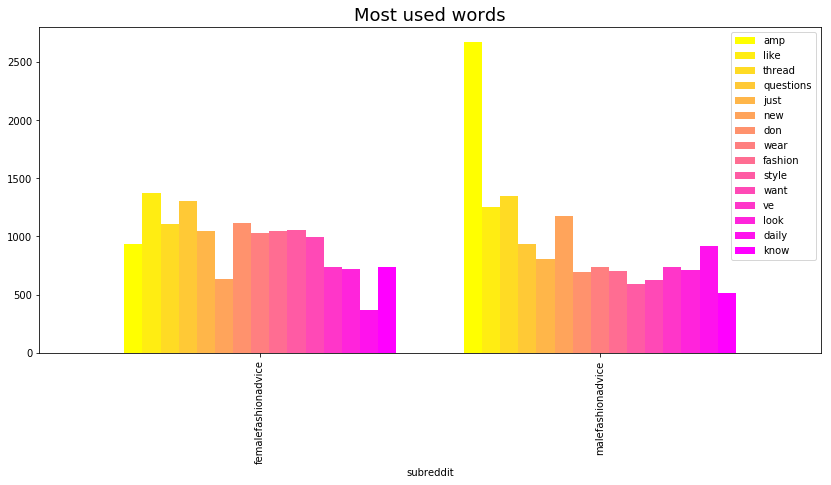

In [23]:
fig, ax = plt.subplots(figsize=(14,6))

feature_df.groupby(df['subreddit']).sum()[common_words2].plot.bar(ax=ax, width=.8, colormap='spring_r')

ax.set_title('Most used words', fontsize=18);

The function below returns word counts and sentence length, which I used to compare the overall posts length between the subreddits. It is quite obvious that female fashion advice subreddit posts are longer in length and contain more words as opposed to male fashion advice which tend to contain fewer words. Moreover male fashion advice subreddit contains around quarter null values in the post section, althouth male fashion advice subreddit has 3 times more subscribers than female fashion advice subreddit. In my opinion, this is due to that women have more fashion resources available to them.

Absence of the text in the posts is due the nature of the post, where poster poses a question in the title section of the post. Posters in female subreddit however tend to fill in the post with the text, whereas posters in male subreddit tend to leave the post section blank.

In [24]:
def get_lengths(df_in):
    words = [len(sen.split(' ')) for sen in df1.loc[df_in.index, 'slftxt_ttl']\
            if len(sen.split(' ')) < 175]
    length = [len(sen) for sen in df1.loc[df_in.index,'slftxt_ttl']\
             if len(sen) < 700]
    return words, length   

In [25]:
fem_words, fem_length = get_lengths(female)

male_words, male_length = get_lengths(male)

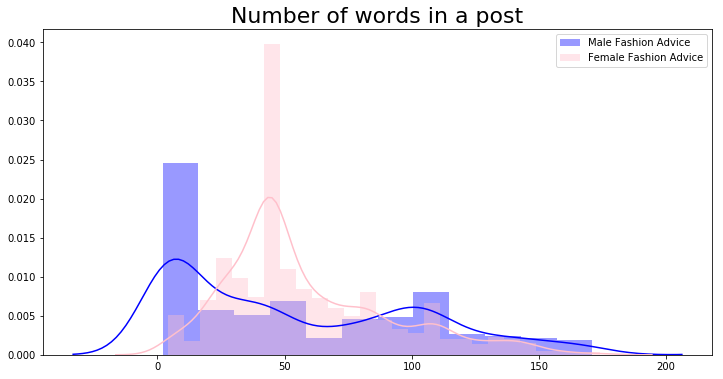

In [26]:
fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(male_words, label='Male Fashion Advice', ax=ax, color='blue')

sns.distplot(fem_words, label='Female Fashion Advice', ax=ax, color='pink')

ax.legend()
plt.title('Number of words in a post', fontsize=22);

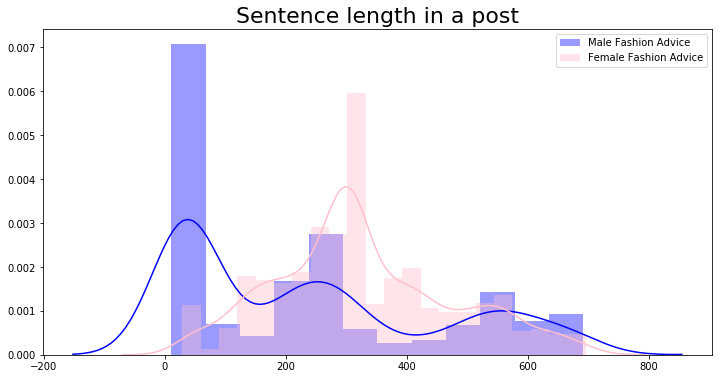

In [27]:
fig, ax = plt.subplots(figsize=(12,6))

sns.distplot(male_length, label='Male Fashion Advice', ax=ax, color='blue')

sns.distplot(fem_length, label='Female Fashion Advice', ax=ax, color='pink')

ax.legend()
plt.title('Sentence length in a post', fontsize=22);
# ax.set_xbound(-10, 125);

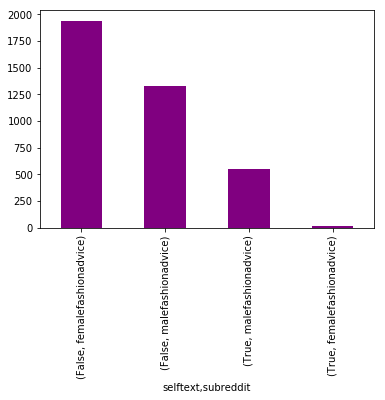

In [28]:
df.groupby(df['selftext'].isnull())['subreddit'].value_counts().plot(kind='bar', color='purple');

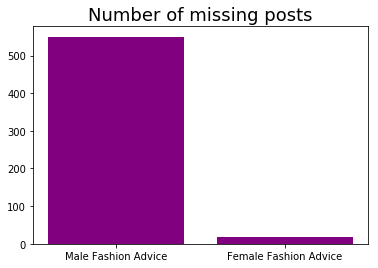

In [29]:
x = ['Male Fashion Advice', 'Female Fashion Advice']
y = [550, 19]
plt.bar(x, y, color='purple')
plt.title('Number of missing posts', fontsize=18);

## <a name = 'Model' style = 'color: black'>Model performance and analysis</a>

Splitting the data and GridSearching for best parameters:


 - I used several lists of stop words and customs words. Custom words list rids off gender related words such as **Men, Women, His, Her** and those words are also added to the English stop words. I used build in CountVectorizer English stop words in [Initial Model Notebook](./Model_2.ipynb) which wasn't picked as best parameters by the GridSearch, so I dropped that list in this section of parameter search
 
 
 - Logistic regression performed better than the Naive Bayes model and also it is more interpretable in terms of this project, so I used LR in the Pipeline. As you can see the model performs really good:
 
         - True positive rate is 100% which is to say that there are zero False Positives, but in the case of this model it doesn't really matter which rate to maximize or what Type of Error to minimize since it doesn't have a significant consequences as in the medical classification model for instance.
         
         - True negative rate is 98% which is also really good
         

 - Using combination of one and two words is certainly best for this model since we can already draw from the EDA above and from the [Coefficient analysis](#Coefficient) that the stop words in combination and by themselves are very good predictors of whether the post comes from male subreddit or female subreddit
 
 
 - For the final model I used Logistic Regression, although I haven't GridSearched over it parameters. The model is excellent as is for this project.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df['slftxt_ttl'], df['target'], random_state=42)

In [31]:
pipe = Pipeline([('cvec', CountVectorizer()),
                ('lr', LogisticRegression())])

In [32]:
params = {
    'cvec__max_features': [1000, 2000, 3000],
    'cvec__min_df': [30, 50],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'cvec__stop_words': [stops, custom_stops]
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Rauan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  2.5min finished


0.9763560500695411


{'cvec__max_df': 0.9,
 'cvec__max_features': 2000,
 'cvec__min_df': 30,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['www',
  'com',
  'reddit',
  'http',
  'https',
  'malefashionadvice',
  'femalefashionadvice',
  'mens',
  'men',
  'man',
  'woman',
  'women',
  'womens',
  'her',
  'his']}

In [33]:
gs.score(X_train, y_train)

1.0

In [34]:
gs.score(X_test, y_test)

0.9916579770594369

In [35]:
pred = gs.predict(X_test)

In [36]:
pd.DataFrame(confusion_matrix(pred, y_test),
            columns=['pred female', 'pred male'], index=['actual female', 'actual male'])

,pred female,pred male
actual female,464,0
actual male,8,487


In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       472
           1       0.98      1.00      0.99       487

   micro avg       0.99      0.99      0.99       959
   macro avg       0.99      0.99      0.99       959
weighted avg       0.99      0.99      0.99       959



### Final Model

In [38]:
cvec = CountVectorizer(max_df=0.9,
                       max_features=2000,
                       min_df=50,
                       ngram_range=(1, 2),
                       stop_words=custom_stops)
X_train_cvec = cvec.fit_transform(X_train)
X_test_cvec = cvec.transform(X_test)

In [39]:
lr = LogisticRegression()
lr.fit(X_train_cvec, y_train)
print(lr.score(X_train_cvec, y_train))
print(lr.score(X_test_cvec, y_test))

1.0
0.9916579770594369


## <a name = 'Coefficient' style = 'color: black'>Coefficients analysis</a>

It can be seen from graph below that **Getting, Cute, Dresses and Love** are huge predictors of the female thread. What surprised me was that **History and Vintage** were assigned stronger coefficients for male thread. My guess is that these words are more meaningful for the male thread in terms of invoking or explaining fashion


The combination of **and it** is a very good predictor that the post belongs to femalefashionadvice since most common word in the male thread is **&** sign.

In [40]:
coef_df = pd.DataFrame(lr.coef_, columns=cvec.get_feature_names()).T

In [41]:
coef_df.nlargest(20, 0)

,0
advice,1.187499
chinos,1.102618
spring summer,1.045208
should,1.040590
vintage,1.028153
casual,0.997952
history,0.986958
worn,0.957471
again,0.906349
and what,0.814843


In [42]:
coef_df.nsmallest(20, 0)

,0
love,-1.328683
dresses,-1.205222
cute,-1.138702
getting,-1.108294
those,-1.090880
ffa,-1.027747
black,-1.010040
and it,-0.988795
every,-0.929711
here,-0.929500


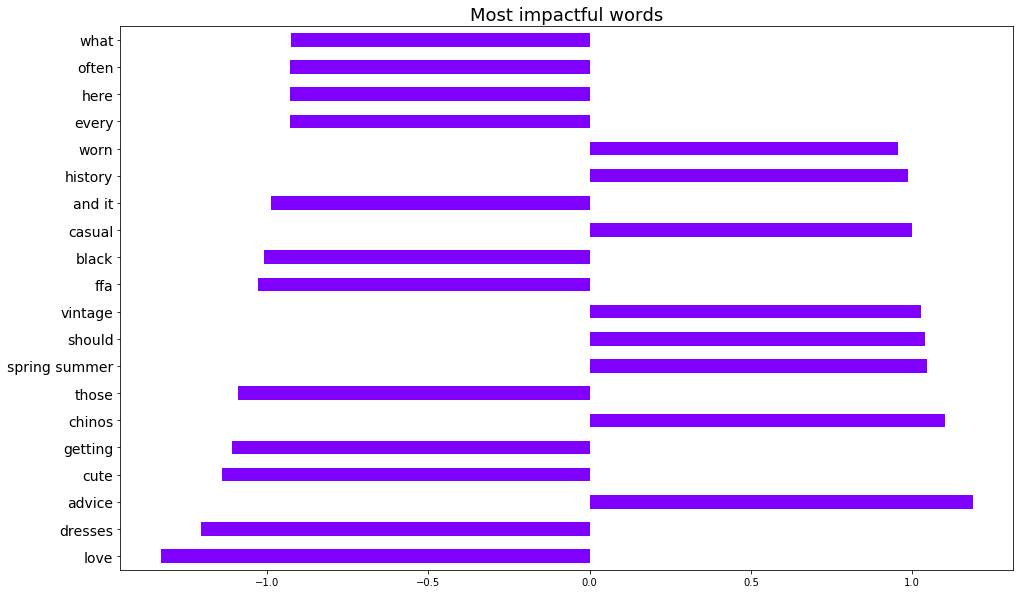

In [43]:
coef_df['abs_coef'] = coef_df[0].abs()
coef_df.sort_values('abs_coef', ascending=False)[0].head(20)\
.plot(kind='barh', figsize=(16,10), colormap='rainbow')
plt.title('Most impactful words', fontsize=18)
plt.yticks(fontsize=14);

## <a name = 'Conclusion' style = 'color: black'>Conclusions on the project</a>

As I stated at the beginning of the project the reason for chosing these two subreddits is due to the nature of the subreddits that gave me an opportunity to pull texts that was actually utilised by both genders in their realted subreddits. And it is clear that there is a big overlap in the words that are used in the fashion context.


In order to make sure that my model is unbiased as possible, I got rid of gender related words and tried running my model with and without the stopwords, and it turns out that the accuracy score jumps up by 10% if I leave the English stop words in. Moreover, lemmatizing or stemmatizing the text does not add value to the model. This in conjunction with the EDA and careful data analysis leads me to the conclusions below:

1. The way we structure our language differs between genders:


     - Posters in Male subreddit tend to use less words in their sentences and posts
     
     - They also tend to abbreviate words more, and hence the high frequency usage of the **$** sign


2. Posters on female fashion advice tend to use more emotional language or word describing emotions such as **love and feel**


3. Although there is a vast amount of overlapping words that are used in the fashion context, phrases and words substantially differ between the two subreddits. Certain words such as 'shirt', 'chinos' or 'dress' have high impact on the predictions ability of the model.


4. Logistic Regression performed better for me in terms of this project as opposed to Naive Bayes, since not only does it have 99$%$ accuracy score but also it is more interpretable so that it helps to analyze what words are the best predictors.





### Possible applications of the project:

1. This model can be used to determine what words are most impactful on gender in terms of marketing fashion products


2. It can be used to define who is commenting certain posts/news


3. It can be used to simulate human-like behaviour, etc.